<a href="https://colab.research.google.com/github/aycakrk/DI725_Ayca/blob/main/assignment_2/ObjectDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install transformers datasets torchvision wandb

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip "/content/drive/MyDrive/auair2019.zip" -d "/content"


In [15]:
import json
import os

# Dosya yolu (Google Drive'dan bağlayınca güncelle)
input_path = "/content/annotations.json"
output_path = "/content/annotations_coco.json"
image_folder = "/content/images"

with open(input_path, "r") as f:
    text = f.read()
    raw_data = json.loads(text)


images = []
annotations = []
categories = [
    {"id": 1, "name": "Human"},
    {"id": 2, "name": "Car"},
    {"id": 3, "name": "Truck"},
    {"id": 4, "name": "Van"},
    {"id": 5, "name": "Motorbike"},
    {"id": 6, "name": "Bicycle"},
    {"id": 7, "name": "Bus"},
    {"id": 8, "name": "Trailer"},
]


image_id_map = {}  # image_name → image_id
annotation_id = 1

for idx, item in enumerate(raw_data['annotations']):
    image_name = item['image_name']

    if image_name not in image_id_map:
        image_id = len(image_id_map) + 1
        image_id_map[image_name] = image_id

        images.append({
            "id": image_id,
            "file_name": image_name,
            "width": item["image_width:"],
            "height": item["image_height"]
        })

    for box in item['bbox']:
        x = box['left']
        y = box['top']
        w = box['width']
        h = box['height']
        cls = box['class']

        annotations.append({
            "id": annotation_id,
            "image_id": image_id_map[image_name],
            "category_id": cls + 1,
            "bbox": [x, y, w, h],
            "area": w * h,
            "iscrowd": 0
        })
        annotation_id += 1

coco_format = {
    "images": images,
    "annotations": annotations,
    "categories": categories
}

with open(output_path, "w") as f:
    json.dump(coco_format, f, indent=4)

print(f"COCO file saved: {output_path}")


COCO file saved: /content/annotations_coco.json


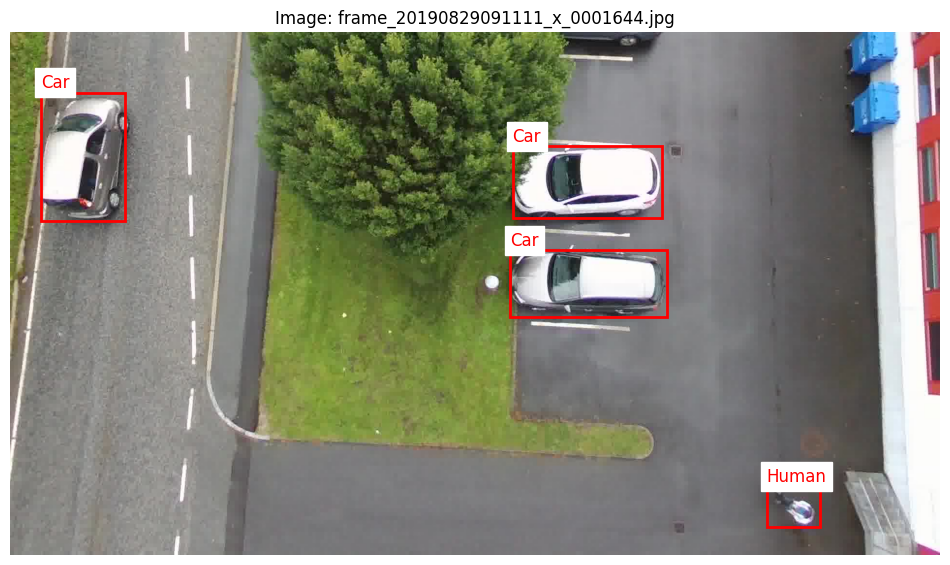

In [18]:
import json
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import os
from PIL import Image

# COCO formatındaki json dosyasını oku
with open("/content/annotations_coco.json", "r") as f:
    coco = json.load(f)

# select an image
image_info = coco["images"][10]
image_id = image_info["id"]
image_path = os.path.join("/content/images", image_info["file_name"])

# Görseli yükle
image = Image.open(image_path)

# Plot başlat
fig, ax = plt.subplots(1, figsize=(12, 8))
ax.imshow(image)

# Annotations içinden bu görsele ait olanları filtrele
for ann in coco["annotations"]:
    if ann["image_id"] == image_id:
        bbox = ann["bbox"]
        category_id = ann["category_id"]
        category_name = next(c["name"] for c in coco["categories"] if c["id"] == category_id)

        # draw Rectangle
        rect = patches.Rectangle((bbox[0], bbox[1]), bbox[2], bbox[3],
                                 linewidth=2, edgecolor='red', facecolor='none')
        ax.add_patch(rect)
        # Kategori ismini yaz
        ax.text(bbox[0], bbox[1] - 10, category_name,
                color='red', fontsize=12, backgroundcolor='white')

plt.axis('off')
plt.title(f"Image: {image_info['file_name']}")
plt.show()
